# Multivariate Joint Use Case (Single DataFrameCase)

In this vignette a use case of the Multivariate Channel Entropy Triangle is presented. We are going to evaluate some feature transformation performed with the PCA algirthm.

### Importing Libraries

We import the package entropytriangle, which will import the modules needed for the evaluation

In [1]:
from entropytriangle import * #importing all modules necessary for the plotting

## Download the databases

In this case, the csv files for the use case, are stored locally. Now it´s time to load the database in which we are going to apply the feature transformation

In [2]:
#df = pd.read_csv('Arthitris.csv',delimiter=',',index_col='Unnamed: 0').drop(['ID'],axis = 1)
#df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = discretization(df).fillna(0)

/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/entropytriangle/auxfunc.py:35: UserWarning: Discretizing data!
  warning("Discretizing data!")


### Prepare the data for the PCA feature transformation (Features - Classes) 

Importing the Sklearn modules for the feature transformation

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Splitting the Data for the Standarization of the features before the transformation

In [7]:
features = df.columns.drop('Species')
x = df[df.columns.drop('Species')].values
# Separating out the target
y = df.loc[:,['Species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Transformation of the data. We will store the entropy dataframes in a list, which will store in each possition the features transformations with the corresponding number of number of principal components. The number of principal components will be: 

Number of cols of original df - index 

Example list[0] = Feature transformation with (iris features cols = 4) - (index = 0) = 4 Principal components

In [8]:
li = list()
for i in range(len(df.columns)):
    pca = PCA(n_components = (len(df.columns)-1)-i)
    principalComponents = pca.fit_transform(x)
    columns = list(map(lambda x: "principal component " + str(x), range(len(df.columns)-1-i)))
    principalDf = pd.DataFrame(data = principalComponents, columns= columns)
    li.append(principalDf)


### Channel Multivariate Entropy Triangle

Calculation of the entropy Data Frame for each of the dataframes of the list

In [9]:
edf = list()
for i in range(len(li)-1):
    edf.append(jentropies(df,li[i])) 

/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/entropytriangle/jentropies.py:50: UserWarning: Discretizing data from X DataFrame before entropy calculation!
  warning("Discretizing data from X DataFrame before entropy calculation!") #' Throwing a Warning for communicating a discretization of data
/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/entropytriangle/auxfunc.py:35: UserWarning: Discretizing data!
  warning("Discretizing data!")
/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/entropytriangle/jentropies.py:54: UserWarning: Discretizing data from X DataFrame before entropy calculation!
  warning("Discretizing data from X DataFrame before entropy calculation!") #' Throwing a Warning for communicating a discretization of data


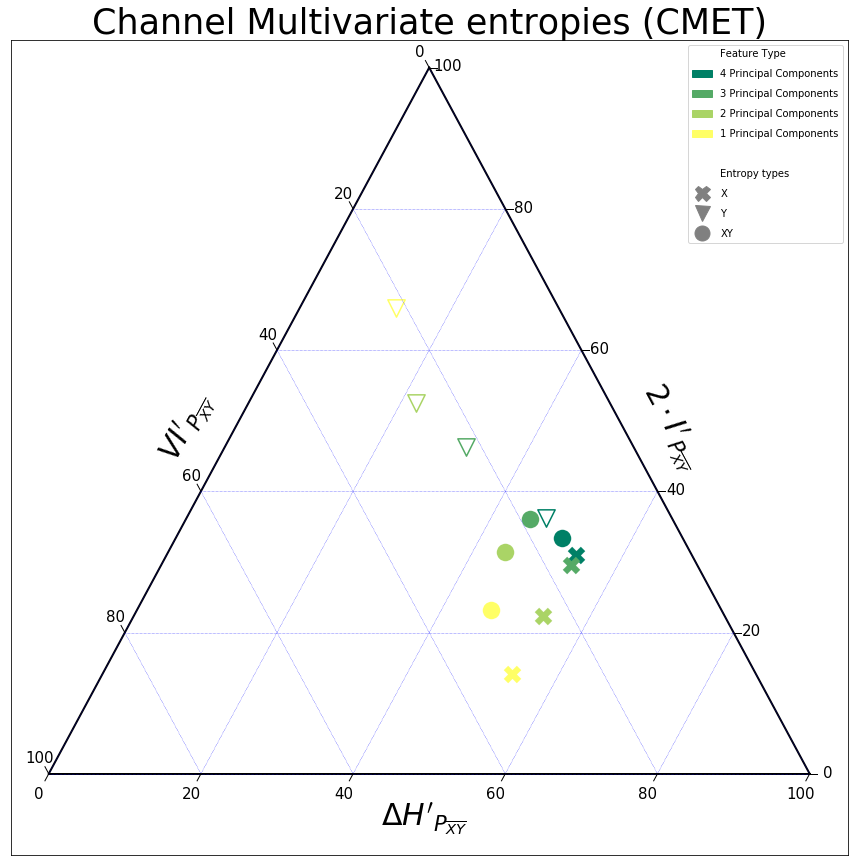

In [10]:
entriangle_list(edf,s_mk=300,pltscale=15)